# Data Preparation

## Imports and data download

In [223]:
# Data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Visualization
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.tree import export_graphviz
import pydot
from pprint import pprint

features = pd.read_csv('../Data_R_total.csv')
features.head(5)

,trk_id,Inf_ID,dayNightRatio,dayMinutes,nightMinutes,moonDay,moonDur,moonPhase,Gear,nb_captures,...,Cheilinus undulatus,Lutjanus rivulatus,Bothus pantherinus,Caranx papuensis,Carangoides ferdau,Caranx ignobilis,Elagatis bipinnulata,Aprion virescens,Scomberoides lysan,Pterocaesio sp.
0,AA003_8,AA003,1.000000,79.0,0.0,3,79.0,New,line,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AH007_8,AH008,1.000000,30.0,0.0,28,30.0,New,line,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AH010_38,AH010,0.905882,154.0,16.0,17,0.0,Full,line,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AM001_47,AM001,1.000000,30.0,0.0,23,0.0,Waning,line,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AM016_17,AM016,1.000000,120.0,0.0,21,0.0,Waning,line,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
print('The shape of our features is:', features.shape)

The shape of our features is: (802, 90)


Le One hot encoding prend ceci:

| Gear |
|------|
| line  |
| net  |
| spear_night  |
| spear_day  |
| net  |

et le converti en :

| line | net | spear_night | spear_day |
|-----|-----|-----|-----|
| 1   | 0   | 0   | 0   |
| 0   | 1   | 0   | 0   |
| 0   | 0   | 1   | 0   |
| 0   | 0   | 0   | 1   |
| 0   | 1   | 0   | 0   |


## Features and labels, preprocessing

### Possible features 

In [225]:
"""
cols_to_remove = ['trk_id', 'nb_captures', 'nb_especes', 
       'Parrotfish', 'Serranidae',
       'Parupeneus sp.', 'Sphyraena', 'Platax', 'Caranx melampygus',
       'Naso lituratus', 'Naso unicornis', 'Holocentrinae', 'Monotaxis',
       'Mulloidichtys sp.', 'Myripristinae', 'Epinephelus sp.', 'Mullidae',
       'Gnathodentex aureolineatus', 'Cheilinus sp.', 'Acanthurus sp.',
       'Lutjanidae', 'Cephalopholis argus', 'Siganidae', 'Mugilidae', 'Chanos',
       'Epibulus sp.', 'Kyphosus', 'Holocentridae', 'Polydactylus',
       'Lutjanus monostigma', 'Acanthurus blochii', 'Naso sp.', 'Balistidae',
       'Labridae', 'Lethrinus', 'Acanthurus olivaceus', 'Carangidae',
       'Acanthuridae', 'Acanthurus xanthopterus', 'Cephalopholis sp.',
       'Priacanthidae', 'Lutjanus gibbus', 'Kuhliidae',
       'Crenimugil crenilabis', 'Tylosurus', 'Albula sp.', 'Lutjanus bohar',
       'Aphareus sp.', 'Lethrinidae', 'Liza vaigiensis',
       'Acanthurus nigricauda', 'Ctenochaetus striatus', 'Lutjanus fulvus',
       'Aluterus', 'Abudefduf sp.', 'Fistularia sp.', 'Acanthurus triostegus',
       'Caranx sp.', 'Coris sp.', 'Acanthurus lineatus', 'Diodon',
       'Balistoides viridescens', 'Selar', 'Chaetodon ornatissimus',
       'Heniochus acuminatus', 'Caranx sexfasciatus', 'Monacanthidae',
       'Acanthurinae', 'Cheilinus undulatus', 'Lutjanus rivulatus',
       'Bothus pantherinus', 'Caranx papuensis', 'Carangoides ferdau',
       'Caranx ignobilis', 'Elagatis bipinnulata', 'Aprion virescens',
       'Scomberoides lysan', 'Pterocaesio sp.']
"""

# features_to_keep = ['Parrotfish', 'Serranidae',
#        'Parupeneus sp.', 'Sphyraena', 'Platax', 'Caranx melampygus',
#        'Naso lituratus', 'Naso unicornis', 'Holocentrinae', 'Monotaxis',
#        'Mulloidichtys sp.', 'Myripristinae', 'Epinephelus sp.', 'Mullidae',
#        'Gnathodentex aureolineatus', 'Cheilinus sp.', 'Acanthurus sp.',
#        'Lutjanidae', 'Cephalopholis argus', 'Siganidae', 'Mugilidae', 'Chanos',
#        'Epibulus sp.', 'Kyphosus', 'Holocentridae', 'Polydactylus',
#        'Lutjanus monostigma', 'Acanthurus blochii', 'Naso sp.', 'Balistidae',
#        'Labridae', 'Lethrinus', 'Acanthurus olivaceus', 'Carangidae',
#        'Acanthuridae', 'Acanthurus xanthopterus', 'Cephalopholis sp.',
#        'Priacanthidae', 'Lutjanus gibbus', 'Kuhliidae',
#        'Crenimugil crenilabis', 'Tylosurus', 'Albula sp.', 'Lutjanus bohar',
#        'Aphareus sp.', 'Lethrinidae', 'Liza vaigiensis',
#        'Acanthurus nigricauda', 'Ctenochaetus striatus', 'Lutjanus fulvus',
#        'Aluterus', 'Abudefduf sp.', 'Fistularia sp.', 'Acanthurus triostegus',
#        'Caranx sp.', 'Coris sp.', 'Acanthurus lineatus', 'Diodon',
#        'Balistoides viridescens', 'Selar', 'Chaetodon ornatissimus',
#        'Heniochus acuminatus', 'Caranx sexfasciatus', 'Monacanthidae',
#        'Acanthurinae', 'Cheilinus undulatus', 'Lutjanus rivulatus',
#        'Bothus pantherinus', 'Caranx papuensis', 'Carangoides ferdau',
#        'Caranx ignobilis', 'Elagatis bipinnulata', 'Aprion virescens',
#        'Scomberoides lysan', 'Pterocaesio sp.']

# colonnes_a_predire = ['Parrotfish', 'Serranidae',
#        'Parupeneus sp.', 'Sphyraena', 'Platax', 'Caranx melampygus',
#        'Naso lituratus', 'Naso unicornis', 'Holocentrinae']

"\ncols_to_remove = ['trk_id', 'nb_captures', 'nb_especes', \n       'Parrotfish', 'Serranidae',\n       'Parupeneus sp.', 'Sphyraena', 'Platax', 'Caranx melampygus',\n       'Naso lituratus', 'Naso unicornis', 'Holocentrinae', 'Monotaxis',\n       'Mulloidichtys sp.', 'Myripristinae', 'Epinephelus sp.', 'Mullidae',\n       'Gnathodentex aureolineatus', 'Cheilinus sp.', 'Acanthurus sp.',\n       'Lutjanidae', 'Cephalopholis argus', 'Siganidae', 'Mugilidae', 'Chanos',\n       'Epibulus sp.', 'Kyphosus', 'Holocentridae', 'Polydactylus',\n       'Lutjanus monostigma', 'Acanthurus blochii', 'Naso sp.', 'Balistidae',\n       'Labridae', 'Lethrinus', 'Acanthurus olivaceus', 'Carangidae',\n       'Acanthuridae', 'Acanthurus xanthopterus', 'Cephalopholis sp.',\n       'Priacanthidae', 'Lutjanus gibbus', 'Kuhliidae',\n       'Crenimugil crenilabis', 'Tylosurus', 'Albula sp.', 'Lutjanus bohar',\n       'Aphareus sp.', 'Lethrinidae', 'Liza vaigiensis',\n       'Acanthurus nigricauda', 'Ctenochaet

### Preprocessing

#### To predict with the features Gear, habitat, nightMinutes, ...

In [226]:
####################
# Quelle quantité nous étudions :
var_a_predire = 'nb_captures'
###################

# Used for results and single decision trees
newpath = 'RF/'+var_a_predire
if not os.path.exists(newpath):
    os.makedirs(newpath)
file_path = newpath+'/variables_importance_'+var_a_predire

# # # If wanted to print results in a file (other lines to uncomment in "Predictions..." and "Visualizations") :
# # f = open(file_path+'.txt', 'w')


features_to_keep = ['Inf_ID', 'dayNightRatio', 'dayMinutes', 'nightMinutes',
       'moonDay', 'moonDur', 'moonPhase', 'Gear', 'passToPass', 'village', 
       'Coast', 'habitat',var_a_predire]

# features_to_keep = ['Inf_ID', 'dayNightRatio', 'dayMinutes', 'nightMinutes', 'moonDay', 'Gear', 'habitat', var_a_predire]

features = features[features_to_keep]

# ###
# ## Pour une normalisation /temps_de_sortie (lignes à décommenter dans "Creation of the model" et "Predictions...") :
# print(features[var_a_predire])
# features[var_a_predire] = features[var_a_predire].div((features['nightMinutes']+features['dayMinutes']),axis=0)
# print(features[var_a_predire])
# ####

labels = features[var_a_predire]

features = features.drop(columns = [var_a_predire])

# One-hot encode categorical features
features = pd.get_dummies(features)
# print(features.head(5))

print('Shape of features after one-hot encoding:', features.shape)

feature_list = list(features.columns)
# features = np.array(features)
# labels = np.array(labels)

Shape of features after one-hot encoding: (802, 94)


#### To predict with the fish species as variables

In [227]:
# ####################
# # Quelle quantité nous étudions :
# var_a_predire = 'Parrotfish'
# ###################


# # Used for results and single decision trees
# newpath = 'RF/'+var_a_predire
# if not os.path.exists(newpath):
#     os.makedirs(newpath)
# file_path = newpath+'/variables_importance_'+var_a_predire

# # # If wanted to print results in a file (other lines to uncomment in "Predictions..." and "Visualizations") :
# # f = open(file_path+'.txt', 'w')


# features_to_keep = ['Parrotfish', 'Serranidae',
#        'Parupeneus sp.', 'Sphyraena', 'Platax', 'Caranx melampygus',
#        'Naso lituratus', 'Naso unicornis', 'Holocentrinae', 'Monotaxis',
#        'Mulloidichtys sp.', 'Myripristinae', 'Epinephelus sp.', 'Mullidae',
#        'Gnathodentex aureolineatus', 'Cheilinus sp.', 'Acanthurus sp.',
#        'Lutjanidae', 'Cephalopholis argus', 'Siganidae', 'Mugilidae', 'Chanos',
#        'Epibulus sp.', 'Kyphosus', 'Holocentridae', 'Polydactylus',
#        'Lutjanus monostigma', 'Acanthurus blochii', 'Naso sp.', 'Balistidae',
#        'Labridae', 'Lethrinus', 'Acanthurus olivaceus', 'Carangidae',
#        'Acanthuridae', 'Acanthurus xanthopterus', 'Cephalopholis sp.',
#        'Priacanthidae', 'Lutjanus gibbus', 'Kuhliidae',
#        'Crenimugil crenilabis', 'Tylosurus', 'Albula sp.', 'Lutjanus bohar',
#        'Aphareus sp.', 'Lethrinidae', 'Liza vaigiensis',
#        'Acanthurus nigricauda', 'Ctenochaetus striatus', 'Lutjanus fulvus',
#        'Aluterus', 'Abudefduf sp.', 'Fistularia sp.', 'Acanthurus triostegus',
#        'Caranx sp.', 'Coris sp.', 'Acanthurus lineatus', 'Diodon',
#        'Balistoides viridescens', 'Selar', 'Chaetodon ornatissimus',
#        'Heniochus acuminatus', 'Caranx sexfasciatus', 'Monacanthidae',
#        'Acanthurinae', 'Cheilinus undulatus', 'Lutjanus rivulatus',
#        'Bothus pantherinus', 'Caranx papuensis', 'Carangoides ferdau',
#        'Caranx ignobilis', 'Elagatis bipinnulata', 'Aprion virescens',
#        'Scomberoides lysan', 'Pterocaesio sp.']


# features = features[features_to_keep]


# ### Pour une normalisation /temps_de_sortie :

# # print(features[var_a_predire])
# # features[var_a_predire] = features[var_a_predire].div((features['nightMinutes']+features['dayMinutes']),axis=0)
# # print(features[var_a_predire])


# labels = features[var_a_predire]

# features = features.drop(columns = [var_a_predire])

# # One-hot encode categorical features
# features = pd.get_dummies(features)
# # print(features.head(5))

# print('Shape of features after one-hot encoding:', features.shape)

# feature_list = list(features.columns)
# # features = np.array(features)
# # labels = np.array(labels)

### Descriptive visualization

In [228]:
# print(features[features["Gear"]=='spear_night']["nb_captures"].sum())

# Gears = ["line", "net", "spear_day", "spear_night"]
# nb_capt = []
# for gear in Gears :
#     for i in range(int(features[features["Gear"]==gear]["nb_captures"].sum())) :
#         nb_capt.append(gear)

# #sets up the axis and gets histogram data
# y1 = features["Gear"]
# y2 = nb_capt
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# colors = ['b','g']
# ax1.hist([y1, y2], color=colors)
# n, bins, patches = ax1.hist([y1,y2])
# ax1.cla() #clear the axis

# #plots the histogram data
# width = (bins[1] - bins[0]) * 0.8
# bins_shifted = bins + width
# ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
# ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

# #finishes the plot
# ax1.set_ylabel("Nb de sorties", color=colors[0])
# ax2.set_ylabel("Nb de captures", color=colors[1])
# ax1.tick_params('y', colors=colors[0])
# ax2.tick_params('y', colors=colors[1])
# plt.tight_layout()
# plt.show()



## Training and Testing Sets

In [229]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
                                                                           random_state = 42)

In [230]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (641, 94)
Training Labels Shape: (641,)
Testing Features Shape: (161, 94)
Testing Labels Shape: (161,)


# Training the Forest

## Creation of the model

In [231]:
# rf = RandomForestRegressor(n_estimators= 1000, random_state=42, max_depth=max_depth)
rf = RandomForestRegressor(n_estimators = 1000, random_state=42, criterion = 'absolute_error', 
                            min_samples_leaf = 2, max_features=15)

# #####
# ## Pour une normalisation /temps_de_sortie :
# to_mul_train = np.array(train_features['nightMinutes']+train_features['dayMinutes'])
# to_mul_test = np.array(test_features['nightMinutes']+test_features['dayMinutes'])

# train_features = train_features.drop(columns = ['nightMinutes', 'dayMinutes'])
# test_features = test_features.drop(columns = ['nightMinutes', 'dayMinutes'])
# #####

train_features = np.array(train_features); train_labels = np.array(train_labels)
test_features = np.array(test_features); test_labels = np.array(test_labels)

rf.fit(train_features, train_labels);

We can create models with different hyperparameters to try and boost performance

In [232]:
rf_new = RandomForestRegressor(n_estimators = 1000, random_state=42, criterion = 'absolute_error', 
                                max_depth = 33, min_samples_leaf = 1, max_features = 11)
rf_new.fit(train_features, train_labels);


rf_new_bis = RandomForestRegressor(n_estimators = 1000, random_state=42, criterion = 'absolute_error', 
                                max_depth = 8, min_samples_leaf = 2, max_features=15)
rf_new_bis.fit(train_features, train_labels);

## Predictions on train et test set

In [233]:
predictions_train = rf.predict(train_features)
predictions_test = rf.predict(test_features)

errors_train = abs(predictions_train - train_labels)
errors_test = abs(predictions_test - test_labels)

print('Mean Absolute Error on the train set:', round(np.mean(errors_train), 2), '')
# f.write('Mean Absolute Error on the train set: '  +str(round(np.mean(errors_train), 2)))
# f.write('\n')   
print('Mean Absolute Error on the test set:', round(np.mean(errors_test), 2), '')
# f.write('Mean Absolute Error on the test set: '  +str(round(np.mean(errors_test), 2)))
# f.write('\n') 
# f.close()
print('\n')

# Autre RF
predictions_train = rf_new.predict(train_features)
predictions_test = rf_new.predict(test_features)

errors_train = abs(predictions_train - train_labels)
errors_test = abs(predictions_test - test_labels)

print('Avec rf_new :')
print('Mean Absolute Error on the train set:', round(np.mean(errors_train), 2), '') 
print('Mean Absolute Error on the test set:', round(np.mean(errors_test), 2), '')
print('\n')

# # Autre RF
predictions_train = rf_new_bis.predict(train_features)
predictions_test = rf_new_bis.predict(test_features)

errors_train = abs(predictions_train - train_labels)
errors_test = abs(predictions_test - test_labels)

print('Avec rf_new_bis :')
print('Mean Absolute Error on the train set:', round(np.mean(errors_train), 2), '') 
print('Mean Absolute Error on the test set:', round(np.mean(errors_test), 2), '')


Mean Absolute Error on the train set: 17.77 
Mean Absolute Error on the test set: 24.2 


Avec rf_new :
Mean Absolute Error on the train set: 10.86 
Mean Absolute Error on the test set: 24.05 


Avec rf_new_bis :
Mean Absolute Error on the train set: 22.11 
Mean Absolute Error on the test set: 24.72 


### With normalization /temps_de_sortie

In [234]:
# ## Pour une normalisation /temps_de_sortie :
# errors_train = abs(predictions_train*to_mul_train - train_labels*to_mul_train)
# errors_test = abs(predictions_test*to_mul_test - test_labels*to_mul_test)

# print('Mean Absolute Error on the train set:', round(np.mean(errors_train), 2), '') 
# print('Mean Absolute Error on the test set:', round(np.mean(errors_test), 2), '')

## Visualization of a single decision tree

In [235]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree_'+var_a_predire+'.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree_'+var_a_predire+'.dot')

# Write graph to a png file
graph.write_png(newpath+'/tree_'+var_a_predire+'.png'); 
os.remove('tree_'+var_a_predire+'.dot')

![Decision Tree](tree.png)

In [236]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 19


Smaller trees for visualization.

In [237]:
# Limit depth of tree
rf_small = RandomForestRegressor(n_estimators = 1000, random_state=42, max_depth = 3, criterion = 'absolute_error', 
                            min_samples_leaf = 2, max_features=15)
rf_small.fit(train_features, train_labels)

for i in range(5) :
    tree_small = rf_small.estimators_[i]

    # Save the tree as a png image
    export_graphviz(tree_small, out_file = 'small_tree_'+str(i)+'_'+var_a_predire+'.dot', feature_names = feature_list, rounded = True, precision = 1)

    (graph, ) = pydot.graph_from_dot_file('small_tree_'+str(i)+'_'+var_a_predire+'.dot')

    graph.write_png(newpath+'/small_tree_'+str(i)+'_'+var_a_predire+'.png')
    os.remove('small_tree_'+str(i)+'_'+var_a_predire+'.dot')

![Small Decision Tree](small_tree.PNG)

# Variable importance

In [238]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
# for pair in feature_importances:
#     f.write('Variable: {:20} Importance: {}'.format(*pair))
#     f.write('\n') # escape line at each element

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: nightMinutes         Importance: 0.16
Variable: habitat_BackReef     Importance: 0.07
Variable: moonDay              Importance: 0.06
Variable: moonDur              Importance: 0.06
Variable: Gear_spear_night     Importance: 0.06
Variable: Inf_ID_TT002         Importance: 0.05
Variable: dayNightRatio        Importance: 0.04
Variable: dayMinutes           Importance: 0.04
Variable: Inf_ID_AM001         Importance: 0.02
Variable: Inf_ID_HA006         Importance: 0.02
Variable: Gear_spear_day       Importance: 0.02
Variable: habitat_LagDeep      Importance: 0.02
Variable: Inf_ID_AM016         Importance: 0.01
Variable: Inf_ID_AM019         Importance: 0.01
Variable: Inf_ID_AM030         Importance: 0.01
Variable: Inf_ID_AP001         Importance: 0.01
Variable: Inf_ID_AP005         Importance: 0.01
Variable: Inf_ID_PM008         Importance: 0.01
Variable: Inf_ID_TT003         Importance: 0.01
Variable: moonPhase_Full       Importance: 0.01
Variable: moonPhase_New        Importanc

## Visualizations

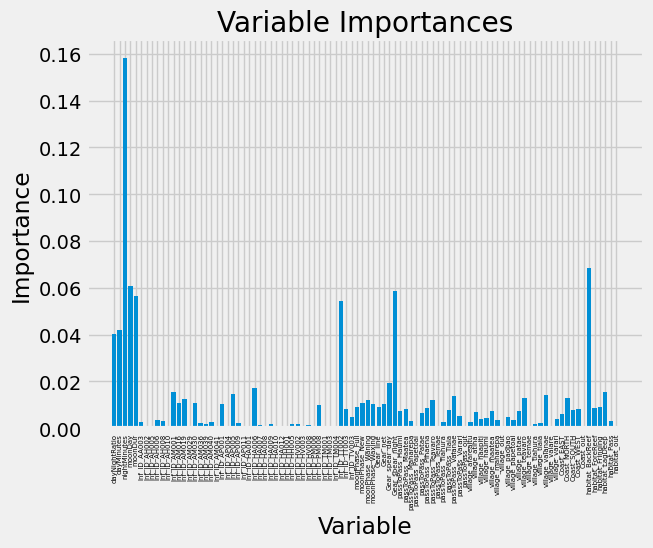

In [239]:
%matplotlib inline
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical', fontsize=5)

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 
plt.savefig(file_path+'.png')

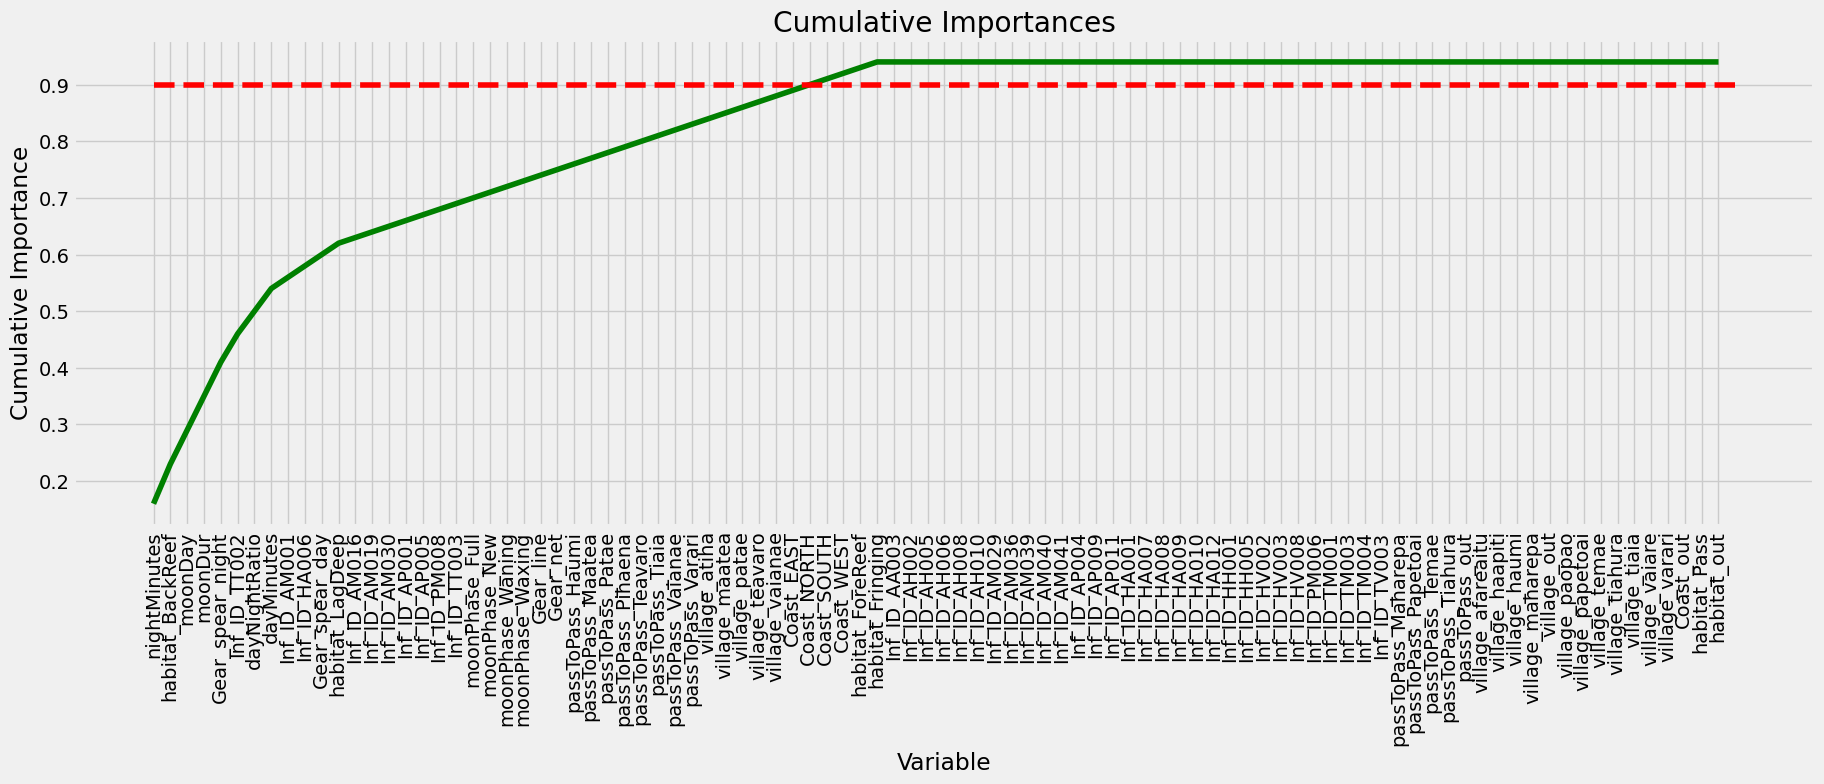

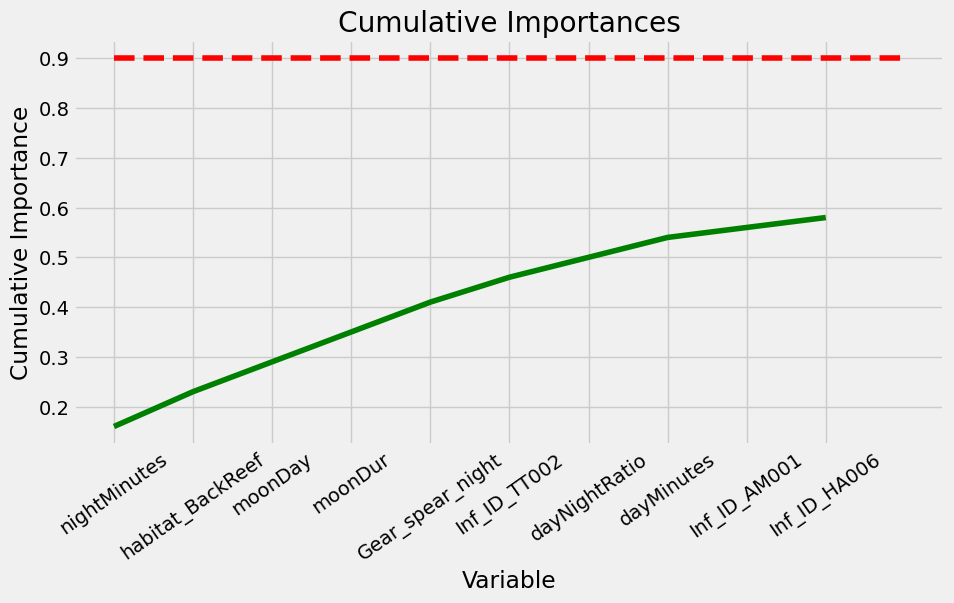

In [240]:
x_values = list(range(len(importances)))

# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
plt.figure(figsize=(20,6))
plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
plt.show()

# Cumulative importances top 10
cumulative_importances = np.cumsum(sorted_importances)
plt.figure(figsize=(10,5))
plt.plot(x_values[:10], cumulative_importances[:10], 'g-')
plt.hlines(y = 0.9, xmin=0, xmax=len(sorted_importances[:10]), color = 'r', linestyles = 'dashed')
plt.xticks(x_values[:10], sorted_features[:10], rotation = 35)
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
plt.show()

## Select the most important features

### Create the sets

In [241]:
# Find number of features for cumulative importance of 95% and add 1 because python is zero-indexed
nb_expl_features = np.where(cumulative_importances > 0.9)[0][0] + 1
print('Number of features for 95% importance:', nb_expl_features)

Number of features for 95% importance: 40


In [242]:
important_feature_names = [feature[0] for feature in feature_importances[0:nb_expl_features]]
important_indices = [feature_list.index(feature) for feature in important_feature_names]

important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (641, 40)
Important test features shape: (161, 40)


### Training a new forest

In [243]:
rf_exp = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_exp.fit(train_features, train_labels);

rf_exp.fit(important_train_features, train_labels);

In [244]:
predictions_train = rf_exp.predict(important_train_features)
predictions_test = rf_exp.predict(important_test_features)

errors_train = abs(predictions_train - train_labels)
errors_test = abs(predictions_test - test_labels)

print('Mean Absolute Error on the train set:', round(np.mean(errors_train), 2), '')
print('Mean Absolute Error on the test set:', round(np.mean(errors_test), 2), '')

Mean Absolute Error on the train set: 10.02 
Mean Absolute Error on the test set: 26.15 


# Fine-tuning with optuna

In [245]:
# import optuna

# def objective(trial):
#     """Define the objective function"""

#     params = {
#         'max_depth': trial.suggest_int('max_depth', 2, 50),
#         'n_estimators': trial.suggest_int('n_estimators', 200, 500),
#         'max_features': trial.suggest_int('max_features', 5, 20),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4)
#     }

#     # Fit the model
#     optuna_model = RandomForestRegressor()
#     optuna_model.set_params(**params)
#     optuna_model.fit(train_features, train_labels)

#     # Make predictions
#     predictions = optuna_model.predict(test_features)

#     # Evaluate predictions
#     mae = mean_absolute_error(test_labels, predictions)
#     return mae


# study = optuna.create_study(direction='minimize')

# study.optimize(objective, n_trials=200)

# print('Number of finished trials: {}'.format(len(study.trials)))
# print('Best trial:')
# trial = study.best_trial

# print('  Value: {}'.format(trial.value))
# print('  Params: ')

# for key, value in trial.params.items():
#     print('    {}: {}'.format(key, value))

# Random search with cross validation

In [246]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = [int(x) for x in np.linspace(5, 40, num = 11)]
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(3, 25, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [1, 2, 4]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# pprint(random_grid)

In [247]:
# rf_grid = RandomForestRegressor(random_state = 42)
# # Random search of parameters : 3 fold cross validation, 100 different combinations
# rf_random = RandomizedSearchCV(estimator=rf_grid, param_distributions=random_grid,
#                               n_iter = 100, scoring='neg_mean_absolute_error', 
#                               cv = 3, verbose=2, random_state=42, n_jobs=-1,
#                               return_train_score=True)

# # Fit the random search model
# rf_random.fit(train_features, train_labels);

In [248]:
# rf_random.best_params_

In [249]:
# best_random = rf_random.best_estimator_

# predictions_train = best_random.predict(train_features)
# predictions_test = best_random.predict(test_features)

# errors_train = abs(predictions_train - train_labels)
# errors_test = abs(predictions_test - test_labels)

# print('Mean Absolute Error on the train set:', round(np.mean(errors_train), 2), '')
# print('Mean Absolute Error on the test set:', round(np.mean(errors_test), 2), '')